# Evaluation of the equilibrium runs
Model output produced by the `my_eq_run.py` script on cluster.

In [1]:
# import section
import os
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt

# load module for the spectral analysis
from scipy import signal
# load modeule for ACF computations
from statsmodels.tsa import stattools

%matplotlib inline

/Users/oberrauch/miniconda3/envs/oggm_env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Read the output of the VAS model.

In [3]:
# specify path and read datasets
path = '/Users/oberrauch/work/master/cluster/run_output/eq_run_ref_mb.nc'
ds = xr.open_dataset(path)
# sort by temperature bias
ds = ds.sortby('temp_bias')
ds['normalized'] = [bool(norm) for norm in ds.normalized]

In [73]:
# mass balance data set
path = '/Users/oberrauch/work/master/cluster/run_output/mb_output_sel.nc'
ds_mb = xr.open_dataset(path)
# sort by temperature bias
ds_mb = ds_mb.sortby('temp_bias')

Define some colors...

In [4]:
# define color cycles
vas_cycle = np.array(['#3D348B', '#6DAEDB', '#FFAE03', '#FB6107', '#1B5299', '#3C1518'])
fl_cycle = np.array(['#12130F', '#426A5A', '#BF3B2F', '#7FB685', '#F2C57C', '#2B2D42'])

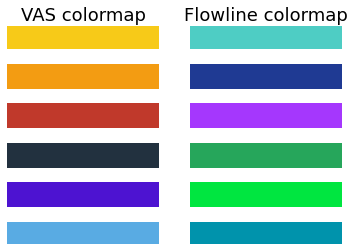

In [5]:
# define color cycles
vas_cycle = np.array(['#f7ca18', '#f39c12', '#c0392b', '#22313f', '#4d13d1', '#59abe3'])
fl_cycle = np.array(["#4ecdc4", "#1f3a93", "#a537fd", "#26a65b", "#00e640", "#0093ac"])
             
fig, ax = plt.subplots(1,2)
for i in np.arange(vas_cycle.size):
    ax[0].axhline(i, c=vas_cycle[i], lw='25')
    ax[1].axhline(i, c=fl_cycle[i], lw='25')

ax[0].set_title('VAS colormap', fontsize=18)
ax[1].set_title('Flowline colormap', fontsize=18)
    
for ax_ in ax:
    ax_.invert_yaxis()
    ax_.axis('off')

Plot PSD for length change of VAS and flowline model in one plot.

In [63]:
rgi_ids = ['RGI60-11.01450', 'RGI60-11.03643', 'RGI60-11.00106', 'RGI60-11.01238',
           'RGI60-11.02766', 'RGI60-11.03638', 'RGI60-11.02773', 'RGI60-11.02704',
           'RGI60-11.00719', 'RGI60-11.02072', 'RGI60-11.00897']
names = ['Großer Aletschgletscher', 'Mer de Glace', 'Pasterze', 'Rhonegletscher',
         'Glacier de Corbassière', "Glacier d'Argentière", 'Findelgletscher', 
         'Allalingletscher', 'Vernagtferner', 'Glacier de la Plaine Morte',
         'Hintereisferner']
ref_glaciers = pd.DataFrame({'name': names}, index=pd.Index(rgi_ids, name='rgi_id'))
ref_glaciers

,name
rgi_id,
RGI60-11.01450,Großer Aletschgletscher
RGI60-11.03643,Mer de Glace
RGI60-11.00106,Pasterze
RGI60-11.01238,Rhonegletscher
RGI60-11.02766,Glacier de Corbassière
RGI60-11.03638,Glacier d'Argentière
RGI60-11.02773,Findelgletscher
RGI60-11.02704,Allalingletscher
RGI60-11.00719,Vernagtferner


/Users/oberrauch/miniconda3/envs/oggm_env/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/Users/oberrauch/miniconda3/envs/oggm_env/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/Users/oberrauch/miniconda3/envs/oggm_env/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/Users/oberrauch/miniconda3/envs/oggm_env/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in true_divide
/Users/oberrauch/miniconda3/envs/oggm_env/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in true_divide
/Users/oberrauch/miniconda3/envs/oggm_env/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in true_divide
/Users/oberrauch/miniconda3/envs/oggm_env/lib/python3.6/site-packages/ipyker

/Users/oberrauch/miniconda3/envs/oggm_env/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/Users/oberrauch/miniconda3/envs/oggm_env/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/Users/oberrauch/miniconda3/envs/oggm_env/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/Users/oberrauch/miniconda3/envs/oggm_env/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in true_divide
/Users/oberrauch/miniconda3/envs/oggm_env/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in true_divide
/Users/oberrauch/miniconda3/envs/oggm_env/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in true_divide
/Users/oberrauch/miniconda3/envs/oggm_env/lib/python3.6/site-packages/ipyker

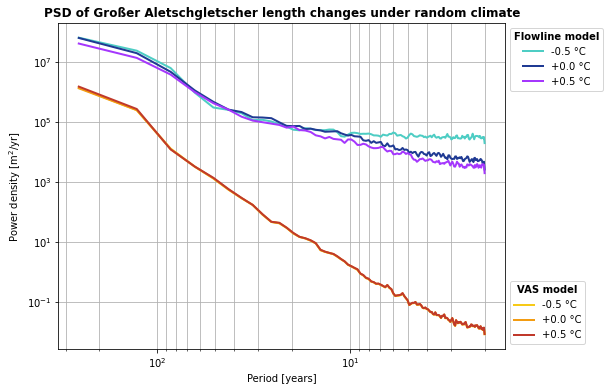

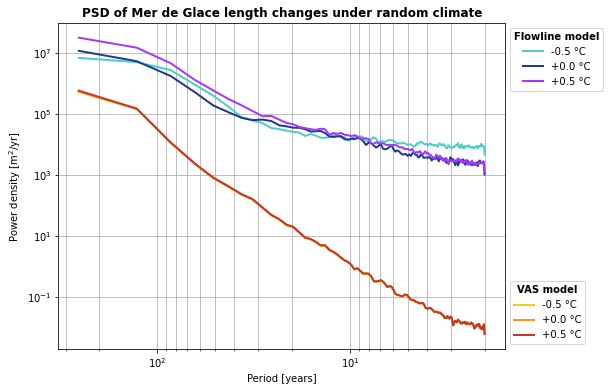

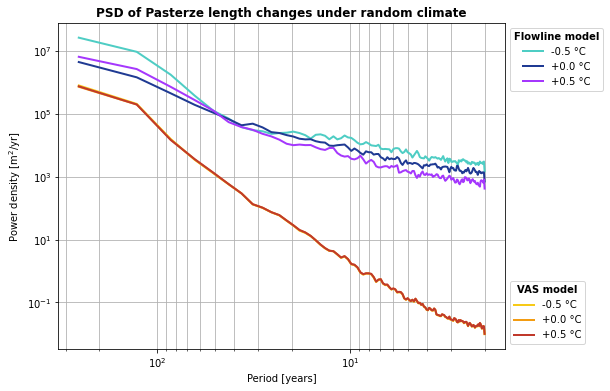

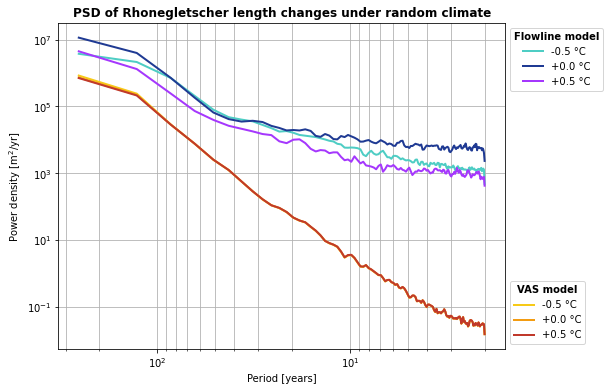

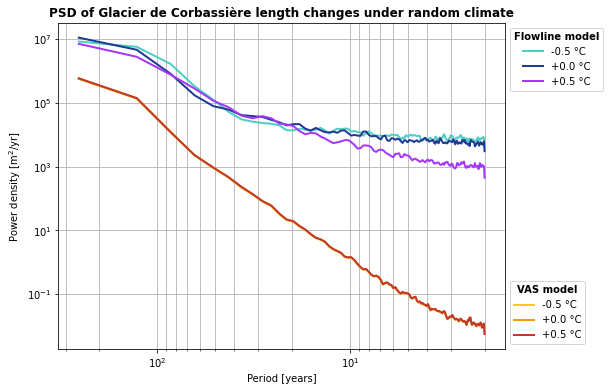

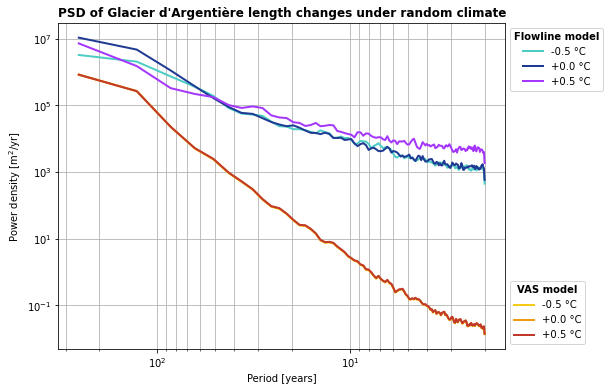

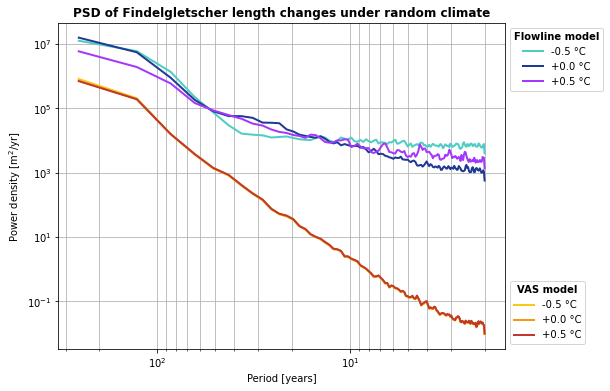

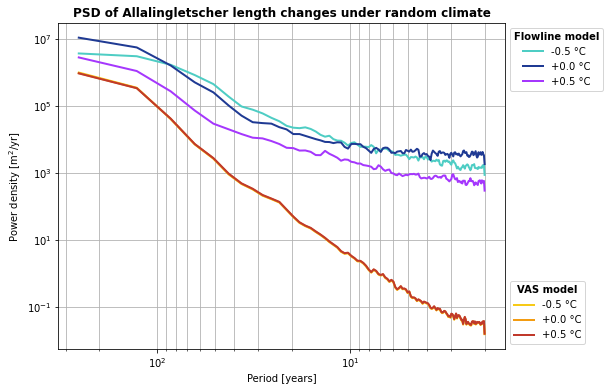

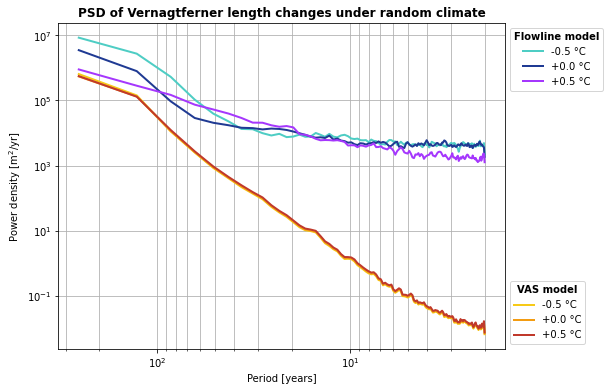

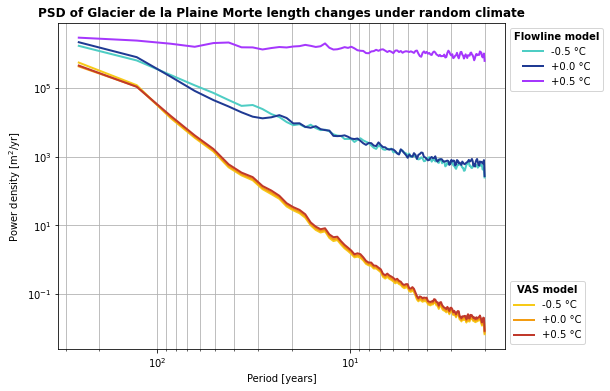

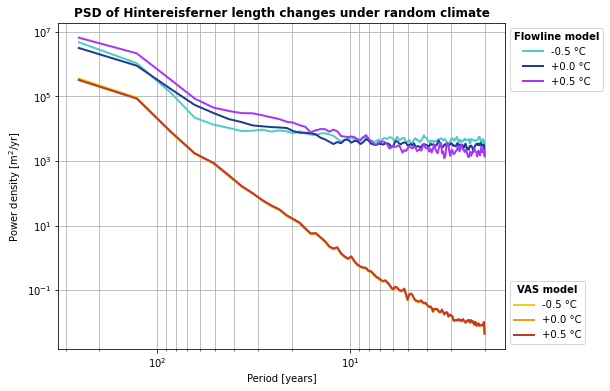

In [77]:
# iterate over all above selected glaciers
for rgi_id, glacier in ref_glaciers.iterrows():
    # select glacier
    rgi_id = rgi_id
    name = glacier['name']
    # create figure and axes
    fig, ax = plt.subplots(1,1, figsize=[8,6])
    # select from complete dataset
    ds_sel = ds.sel(normalized=False,
                    mb_model='random',
                    rgi_id=rgi_id)
    # truncate spinup if necessary
    ds_sel = ds_sel.isel(time=slice(0,None))


    # plots for the FLOWLINE model
    for i, b in enumerate(np.sort(ds.temp_bias)):
        # select values by temperature bias
        ds_tmp = ds_sel.sel(temp_bias=b).length
        # compute the power of the signel per frequency band
        sig = ds_tmp.sel(model='fl').values.flatten()
        freqs, psd = signal.welch(sig)
        # convert frequency into periods
        periods = 1/freqs
        ax.loglog(periods, psd, label='{:+.1f} °C'.format(b), c=fl_cycle[i], lw=2)

    # plots for the V/A SCALING model
    for i, b in enumerate(np.sort(ds.temp_bias)):
        # select values by temperature bias
        ds_tmp = ds_sel.sel(temp_bias=b).length
        # compute the power of the signel per frequency band
        sig = ds_tmp.sel(model='vas').values.flatten()
        freqs, psd = signal.welch(sig)
        # convert frequency into periods
        periods = 1/freqs
        ax.loglog(periods, psd, label='{:+.1f} °C'.format(b), c=vas_cycle[i], lw=2)

    # get legend handles and labels
    handles, labels = ax.get_legend_handles_labels()
    # add a seperate legend for each model
    leg_fl = ax.legend(handles[:3], labels[:3], bbox_to_anchor=(1, 1), loc='upper left')
    leg_fl.set_title('Flowline model', {'weight': 'bold'})
    leg_vas = ax.legend(handles[3:], labels[3:], bbox_to_anchor=(1, 0), loc='lower left')
    leg_vas.set_title('VAS model', {'weight': 'bold'})
    ax.add_artist(leg_fl)

    # add grid
    ax.grid(which='both')
    # invert x-axis
    ax.invert_xaxis()

    # title, labels, ...
    ax.set_title('PSD of {} length changes under random climate'.format(name),
                 {'weight': 'bold'})
    ax.set_xlabel('Period [years]')
    ax.set_ylabel('Power density [m$^2$/yr]')

    # store plot
    f_path = '/Users/oberrauch/work/master/plots/final_plots/psd/{}.pdf'.format(name.replace(' ', '_'))
    plt.savefig(f_path, bbox_inches='tight')


## Power spectral density
Plot PSD for length change and mass balance in two adjacent subplots.

/Users/oberrauch/miniconda3/envs/oggm_env/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide
/Users/oberrauch/miniconda3/envs/oggm_env/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide
/Users/oberrauch/miniconda3/envs/oggm_env/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide
/Users/oberrauch/miniconda3/envs/oggm_env/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide
/Users/oberrauch/miniconda3/envs/oggm_env/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide
/Users/oberrauch/miniconda3/envs/oggm_env/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide
/Users/oberrauch/miniconda3/envs/oggm_env/lib/python3.6/site-packages/ipyker

/Users/oberrauch/miniconda3/envs/oggm_env/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide
/Users/oberrauch/miniconda3/envs/oggm_env/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide
/Users/oberrauch/miniconda3/envs/oggm_env/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide
/Users/oberrauch/miniconda3/envs/oggm_env/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide
/Users/oberrauch/miniconda3/envs/oggm_env/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide
/Users/oberrauch/miniconda3/envs/oggm_env/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide
/Users/oberrauch/miniconda3/envs/oggm_env/lib/python3.6/site-packages/ipyker

/Users/oberrauch/miniconda3/envs/oggm_env/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide
/Users/oberrauch/miniconda3/envs/oggm_env/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide
/Users/oberrauch/miniconda3/envs/oggm_env/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide
/Users/oberrauch/miniconda3/envs/oggm_env/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide
/Users/oberrauch/miniconda3/envs/oggm_env/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide
/Users/oberrauch/miniconda3/envs/oggm_env/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide
/Users/oberrauch/miniconda3/envs/oggm_env/lib/python3.6/site-packages/ipyker

/Users/oberrauch/miniconda3/envs/oggm_env/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide
/Users/oberrauch/miniconda3/envs/oggm_env/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide
/Users/oberrauch/miniconda3/envs/oggm_env/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide
/Users/oberrauch/miniconda3/envs/oggm_env/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide
/Users/oberrauch/miniconda3/envs/oggm_env/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide
/Users/oberrauch/miniconda3/envs/oggm_env/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide
/Users/oberrauch/miniconda3/envs/oggm_env/lib/python3.6/site-packages/ipyker

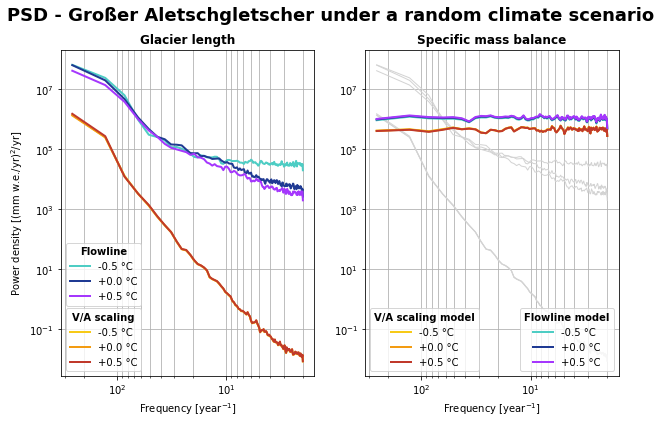

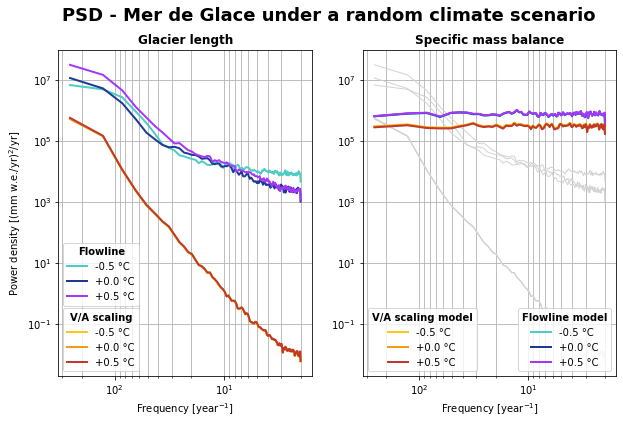

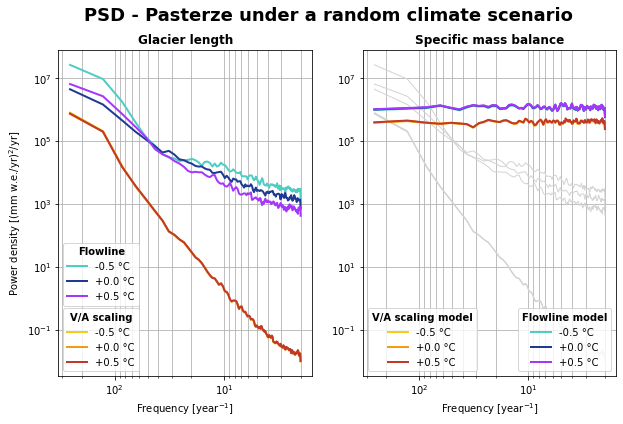

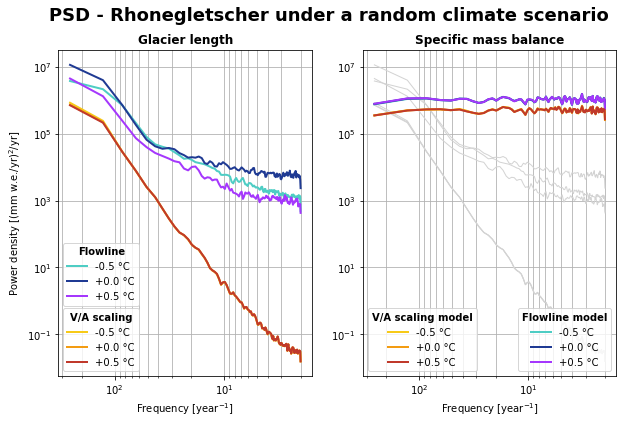

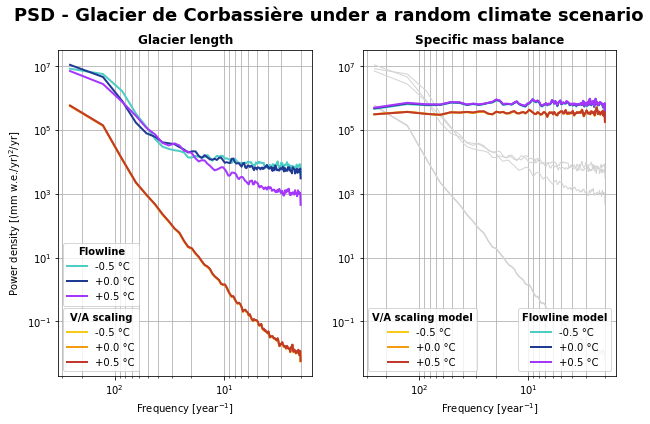

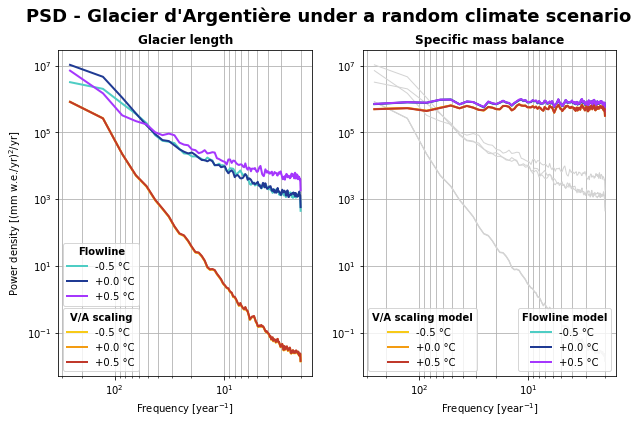

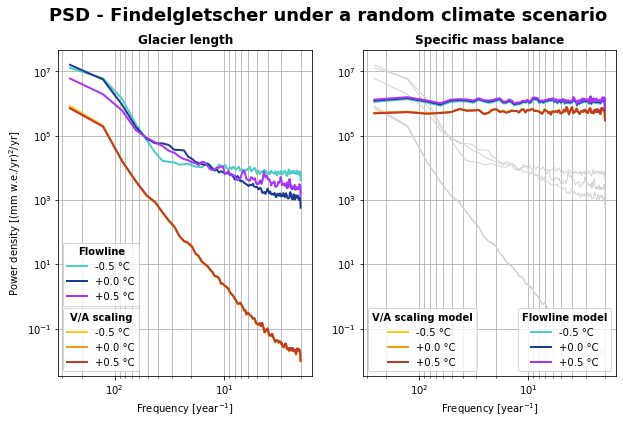

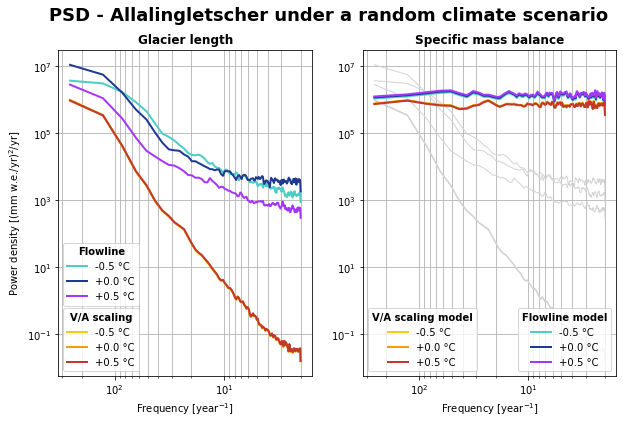

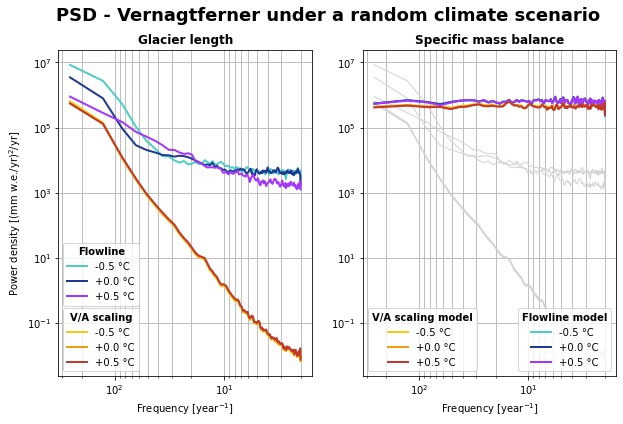

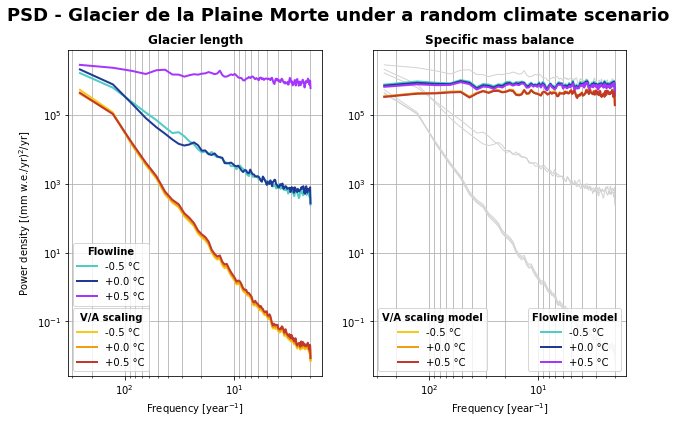

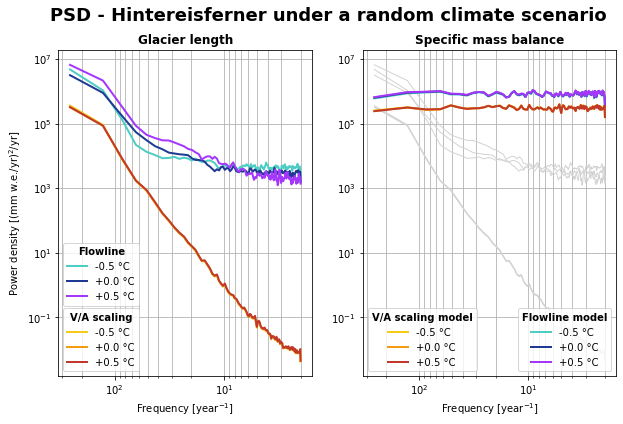

In [78]:
# iterate over all above selected glaciers
for rgi_id, glacier in ref_glaciers.iterrows():
    # select glacier
    rgi_id = rgi_id
    name = glacier['name']
    # create figure and axes
    fig, ax = plt.subplots(1,2, figsize=[10,6])
    # select from complete dataset
    ds_sel = ds.sel(normalized=False,
                    mb_model='random',
                    rgi_id=rgi_id)
    ds_mb_sel = ds_mb.sel(rgi_id=rgi_id)
    # truncate spinup if necessary
    ds_sel = ds_sel.isel(time=slice(0,None))
    ds_mb_sel = ds_mb_sel.isel(year=slice(0,None))


    # plot spectral density of length changes in left subplot
    # -------------------------------------------------------

    # plots for the FLOWLINE model
    for i, b in enumerate(np.sort(ds.temp_bias)):
        # select values by temperature bias
        ds_tmp = ds_sel.sel(temp_bias=b).length

        # compute the power of the signel per frequency band
        sig = ds_tmp.sel(model='fl').values.flatten()
        freqs, psd = signal.welch(sig)
        ax[0].loglog(1/freqs, psd, label='{:+.1f} °C'.format(b), c=fl_cycle[i], lw=2)
        ax[1].loglog(1/freqs, psd, label='{:+.1f} °C'.format(b), c='lightgrey', lw=1)

    # plots for the V/A SCALING model
    for i, b in enumerate(np.sort(ds.temp_bias)):
        # select values by temperature bias
        ds_tmp = ds_sel.sel(temp_bias=b).length

        # compute the power of the signel per frequency band
        sig = ds_tmp.sel(model='vas').values.flatten()
        freqs, psd = signal.welch(sig)
        ax[0].loglog(1/freqs, psd, label='{:+.1f} °C'.format(b), c=vas_cycle[i], lw=2)
        ax[1].loglog(1/freqs, psd, label='{:+.1f} °C'.format(b), c='lightgrey', lw=1)

    # plot spectral density of mass balance in right subplot
    # ------------------------------------------------------
    for j, b in enumerate(np.sort(ds_mb.temp_bias)):
        # select values by temperature bias
        ds_tmp = ds_mb_sel.sel(temp_bias=b).spec_mb

        # compute the power of the signel per frequency band
        sig = ds_tmp.sel(model='fl').values.flatten()
        freqs, psd = signal.welch(sig)
        ax[1].loglog(1/freqs, psd, label='{:+.1f} °C'.format(b), c=fl_cycle[j], lw=2)
        # compute the power of the signel per frequency band
        sig = ds_tmp.sel(model='vas').values.flatten()
        freqs, psd = signal.welch(sig)
        ax[1].loglog(1/freqs, psd, label='{:+.1f} °C'.format(b), c=vas_cycle[j], lw=2)


    # add legend for length
    handles, labels = ax[0].get_legend_handles_labels()
    # add a seperate legend for each model
    leg_fl = ax[0].legend(handles[:3], labels[:3], bbox_to_anchor=(0,0.2), loc='lower left')
    leg_fl.set_title('Flowline', {'weight': 'bold'})
    leg_vas = ax[0].legend(handles[3:], labels[3:], loc='lower left')
    leg_vas.set_title('V/A scaling', {'weight': 'bold'})
    ax[0].add_artist(leg_fl)
    # add lengend for mass balance
    handles, labels = ax[1].get_legend_handles_labels()
    # add a seperate legend for each model
    leg_fl = ax[1].legend(handles[6::2], labels[6::2], loc='lower right')
    leg_fl.set_title('Flowline model', {'weight': 'bold'})
    leg_vas = ax[1].legend(handles[7::2], labels[7::2], loc='lower left')
    leg_vas.set_title('V/A scaling model', {'weight': 'bold'})
    ax[1].add_artist(leg_fl)

    # add grid
    ax[0].grid(which='both')
    ax[1].grid(which='both')
    
    # invert x-axis
    ax[0].invert_xaxis()
    ax[1].invert_xaxis()

    # title, labels, ...
    ax[0].set_title('Glacier length', {'weight': 'bold'})
    ax[1].set_title('Specific mass balance', {'weight': 'bold'})
    ax[0].set_xlabel('Frequency [year$^{-1}$]')
    ax[1].set_xlabel('Frequency [year$^{-1}$]')
    ax[0].set_ylabel('Power density [m$^2$/yr]')
    ax[0].set_ylabel('Power density [(mm w.e./yr)$^2$/yr]')

    # set figure title
    fig.suptitle('PSD - {} under a random climate scenario'.format(name), weight='bold', fontsize=18)

    # store plot
    f_path = '/Users/oberrauch/work/master/plots/final_plots/psd/{}_mb.pdf'.format(name.replace(' ', '_'))
    plt.savefig(f_path, bbox_inches='tight')

## Auto correlation function
Plot the ACF

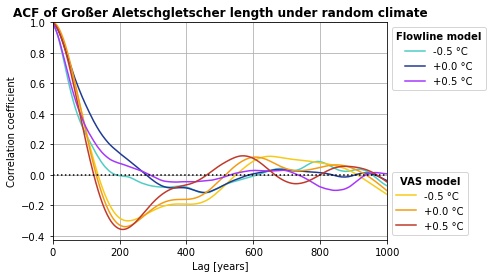

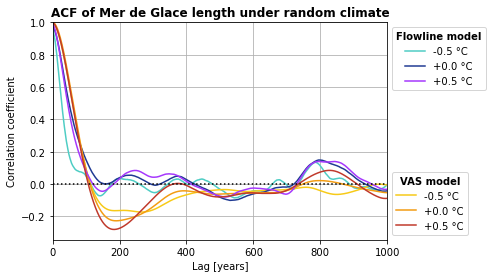

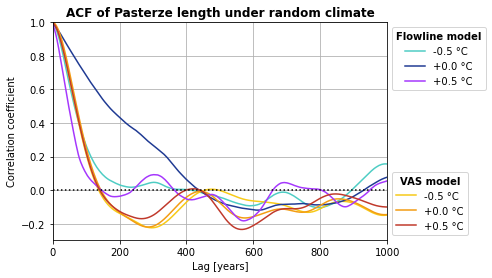

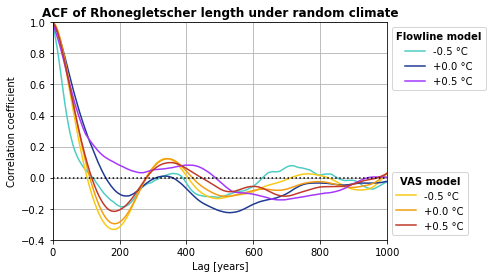

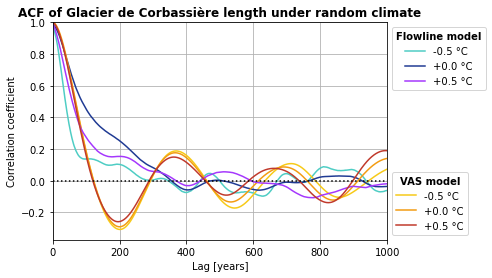

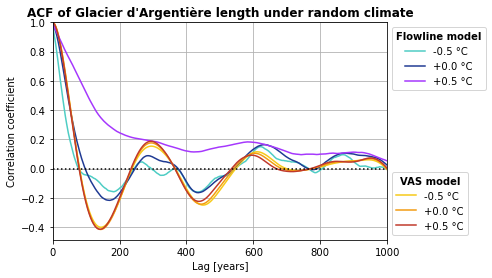

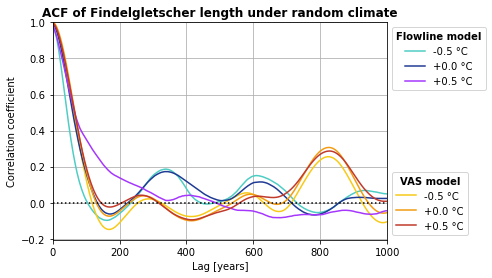

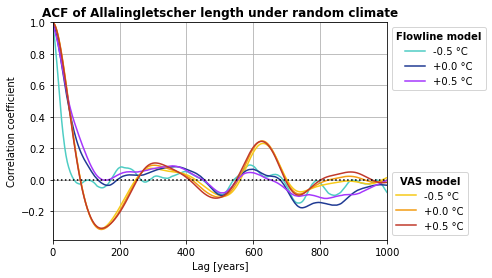

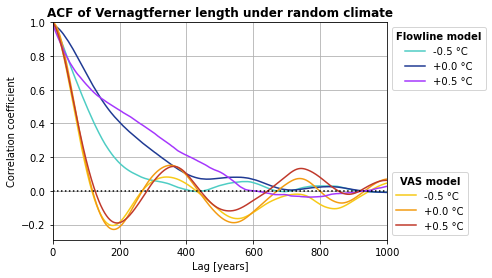

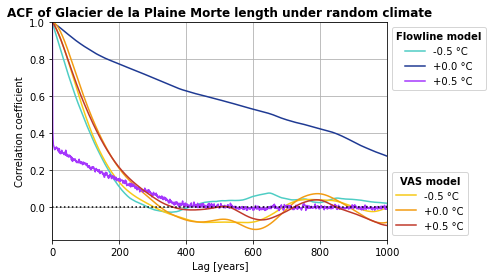

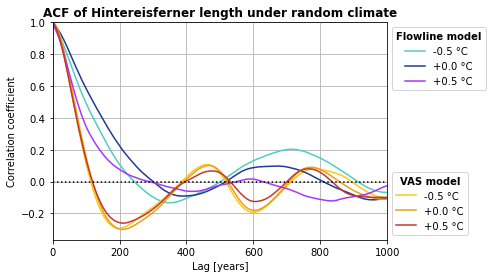

In [83]:
# iterate over all above selected glaciers
for rgi_id, glacier in ref_glaciers.iterrows():
    # select glacier
    rgi_id = rgi_id
    name = glacier['name']

    # create figure and axes
    fig, ax = plt.subplots(1,1)
    # compute acf over 1000 years
    nlags = 1000
    
    # select the complete dataset
    ds_sel = ds.sel(mb_model='random',
                    normalized=False,
                    rgi_id=rgi_id)

    for i, b in enumerate(np.sort(ds.temp_bias)):
        # get length data
        length = ds_sel.sel(temp_bias=b).length
        # plot autocorrelation
        ax.plot(stattools.acf(length.sel(model='fl'), nlags=nlags, fft=True),
                c=fl_cycle[i], label='{:+.1f} °C'.format(b))
        ax.plot(stattools.acf(length.sel(model='vas'), nlags=nlags, fft=True),
                c=vas_cycle[i], label='{:+.1f} °C'.format(b))

    # aux line
    ax.axhline(0, c='k', ls=':')
    # adjust axes
    ax.set_xlim([0, nlags])
    ylim = ax.get_ylim()
    ax.set_ylim([min(ylim), 1])
    # add grid
    ax.grid()

    # get legend handles and labels
    handles, labels = ax.get_legend_handles_labels()
    # add a seperate legend for each model
    leg_fl = ax.legend(handles[::2], labels[::2], bbox_to_anchor=(1, 1), loc='upper left')
    leg_fl.set_title('Flowline model', {'weight': 'bold'})
    leg_vas = ax.legend(handles[1::2], labels[1::2], bbox_to_anchor=(1, 0), loc='lower left')
    leg_vas.set_title('VAS model', {'weight': 'bold'})
    ax.add_artist(leg_fl)

    # labels, title, ...
    ax.set_title('ACF of {} length under random climate'.format(name), {'weight': 'bold'})
    ax.set_xlabel('Lag [years]')
    ax.set_ylabel('Correlation coefficient')

    # store plot
    f_path = '/Users/oberrauch/work/master/plots/final_plots/acf/{}.pdf'.format(name.replace(' ', '_'))
    plt.savefig(f_path, bbox_inches='tight')

## Time series
...

In [86]:
# specify path and read datasets
path = '/Users/oberrauch/work/master/cluster/run_output/eq_run_sel.nc'
ds = xr.open_dataset(path)
# sort by temperature bias
ds = ds.sortby('temp_bias')
ds['normalized'] = [bool(norm) for norm in ds.normalized]

In [95]:
def plot_time_series(ds, var, title='', suptitle=''):
    # plot relative volume change
    fig, [ax0, ax1] = plt.subplots(1, 2, figsize=[10, 5])

    # flowline model
    ds.sel(model='fl')[var].plot(hue='temp_bias', ax=ax0, add_legend=False, color='lightgray', lw=0.5)
    # vas model
    ax0.set_prop_cycle('color', vas_cycle)
    handles_vas = ds.sel(model='vas')[var].plot(hue='temp_bias', ax=ax0, add_legend=False, lw=3)
    labels_vas = ['{:+.1f} °C'.format(bias) for bias in ds.temp_bias.values]
    
    # set axes limits
    ax0.set_xlim([ds.time.min(), ds.time.max()])
    ylim = ax0.get_ylim()
    ax0.set_ylim([ylim[0]*0.5, ylim[1]])
    
    # title, labels, legend
    ax0.set_title('Volume/area scaling model')
    ax0.set_xlabel('Years of model evolution')
    ax0.legend(handles_vas, labels_vas, title='Temperature bias',
           bbox_to_anchor=(0.5, 0), loc=8, ncol=3)
    if ds.normalized:
        # add ylabel
        ax0.set_ylabel('Relative {}'.format(var))
        # aux line
        ax0.axhline(1, lw=0.8, ls=':', c='k')
    else:
        # add ylabel
        unit = 'm' if var == 'length' else 'm$^2$' if var == 'area' else 'm$^3$'
        ax0.set_ylabel('Glacier {} [{}]'.format(var, unit))
        # aux line
        ax0.axhline(ds.sel(model='vas')[var].isel(time=0).mean(), lw=0.8, ls=':', c='k')
        
    ax0.grid()

    # vas model
    ds.sel(model='vas')[var].plot(hue='temp_bias', ax=ax1, add_legend=False, color='lightgray', lw=0.5)
    # flowline model
    ax1.set_prop_cycle('color', fl_cycle)
    handles_fl = ds.sel(model='fl')[var].plot(hue='temp_bias', ax=ax1, add_legend=False)
    labels_fl = ['{:+.1f} °C'.format(bias) for bias in ds.temp_bias.values]

    # set axes limits
    ax1.set_xlim([ds.time.min(), ds.time.max()])
    ylim = ax1.get_ylim()
    ax1.set_ylim([ylim[0]*0.5, ylim[1]])

    # title, labels, legend
    ax1.set_title('Flowline model')
    ax1.set_xlabel('Years of model evolution')
    ax1.legend(handles_fl, labels_fl, title='Temperature bias',
           bbox_to_anchor=(0.5, 0), loc=8, ncol=3)
    ax1.yaxis.tick_right()
    ax1.yaxis.set_label_position('right')
    if ds.normalized:
        # add ylabel
        ax1.set_ylabel('Relative {}'.format(var))
        # aux line
        ax1.axhline(1, lw=0.8, ls=':', c='k')
    else:
        # add ylabel
        unit = 'm' if var == 'length' else 'm$^2$' if var == 'area' else 'm$^3$'
        ax1.set_ylabel('Glacier {} [{}]'.format(var, unit))
        # aux line
        ax1.axhline(ds.sel(model='fl')[var].isel(time=0).mean(), lw=0.8, ls=':', c='k')
        
    ax1.grid()

    # add suptitle
    fig.suptitle(suptitle, fontsize=15)

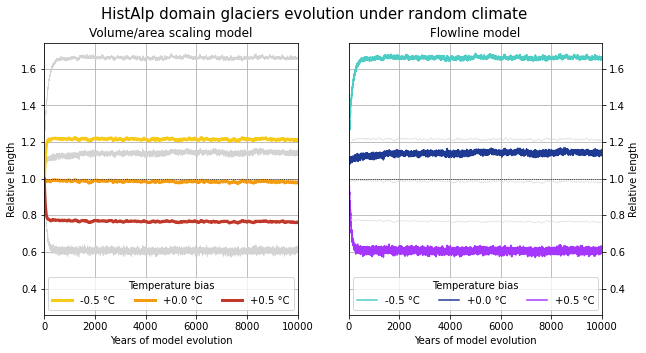

In [98]:
suptitle = 'HistAlp domain glaciers evolution under random climate'
plot_time_series(ds.sel(mb_model='random', normalized=True, rgi_id='sum'),
                 var='length', suptitle=suptitle)
f_path = '/Users/oberrauch/work/master/plots/final_plots/time_series/length_norm_comparison_random.pdf'
plt.savefig(f_path, bbox_inches='tight')

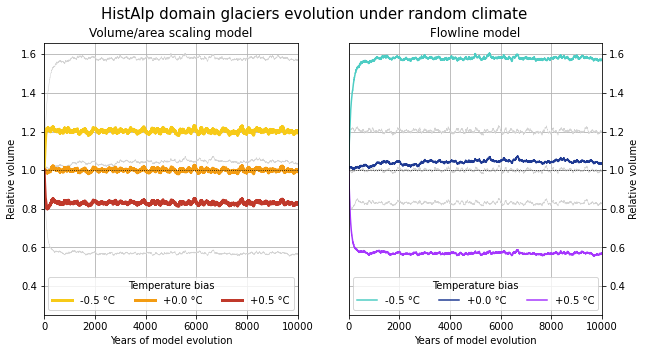

In [99]:
suptitle = 'HistAlp domain glaciers evolution under random climate'
plot_time_series(ds.sel(mb_model='random', normalized=True, rgi_id='sum'),
                 var='volume', suptitle=suptitle)
f_path = '/Users/oberrauch/work/master/plots/final_plots/time_series/volume_norm_comparison_random.pdf'
plt.savefig(f_path, bbox_inches='tight')

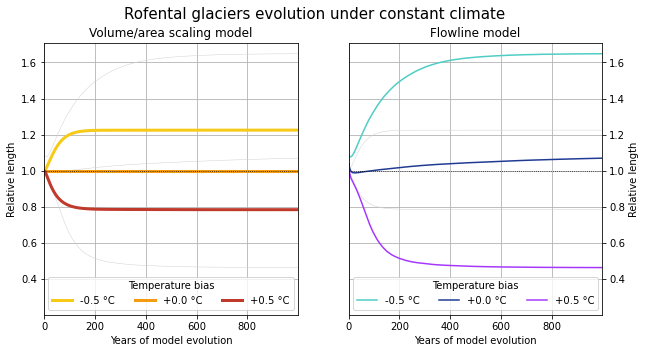

In [96]:
suptitle = 'Rofental glaciers evolution under constant climate'
plot_time_series(ds.sel(mb_model='constant', normalized=True, rgi_id='sum').isel(time=slice(0,1000)),
                 var='length', suptitle=suptitle)
f_path = '/Users/oberrauch/work/master/plots/final_plots/time_series/length_norm_comparison_constant.pdf'
plt.savefig(f_path, bbox_inches='tight')

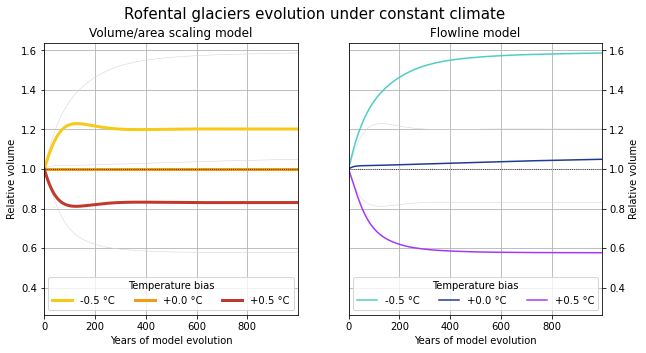

In [100]:
suptitle = 'Rofental glaciers evolution under constant climate'
plot_time_series(ds.sel(mb_model='constant', normalized=True, rgi_id='sum').isel(time=slice(0,1000)),
                 var='volume', suptitle=suptitle)
f_path = '/Users/oberrauch/work/master/plots/final_plots/time_series/volume_norm_comparison_constant.pdf'
plt.savefig(f_path, bbox_inches='tight')

### Plot time series in one panel

In [101]:
def plot_single_timeseries(ds, title='', ylabel=''):
    """
    """
    # plot relative volume change
    fig, ax = plt.subplots(1, 1, figsize=[7, 5])
    
    # set colors
    ax.set_prop_cycle('color', [vas_cycle[0], fl_cycle[0]])
    [ax.axhline(var_0, ls=':', lw=0.8, c='k') for var_0 in ds.sel(time=0).values]

    # flowline model
    handels = ds.plot(hue='model', add_legend=False)
    
    # labels, title, ...
    ax.set_title(title)
    ax.set_xlabel('Years of model evolution')
    ax.set_ylabel(ylabel)
    ax.legend(handels, ['vas', 'flowline'], title='Evolution model', ncol=2, loc=2)
    # axes
    ax.set_xlim([ds.time.min(), ds.time.max()])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

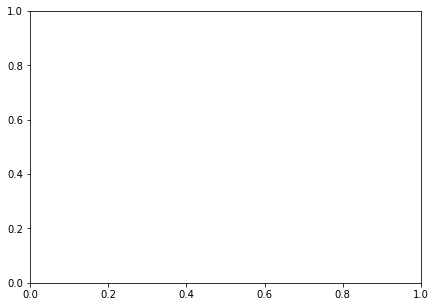

In [102]:
# select single run
temp_bias = 0
# plot relative volume
plot_single_timeseries(ds.volume.sel(temp_bias=temp_bias, normalized=False, mb_model='random'),
                       ylabel='Relative glacier volume',
                       title='HEF model glacier under random climate')
# add information about temperature bias
ax = plt.gca()
ax.text(0.95, 0.05, 'Temperature bias: {:+.1f} °C'.format(temp_bias),
        ha='right', va='center', transform=ax.transAxes)
# save plot to file
plt.savefig('volume_norm_constant.pdf', bbox_inches='tight')

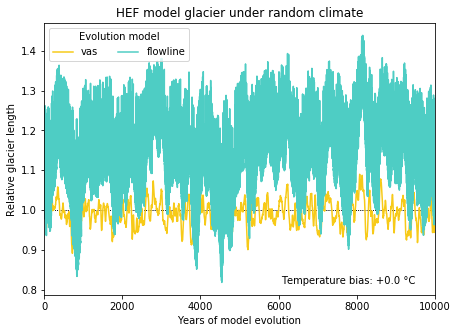

In [114]:
# plot relative length
plot_single_timeseries(ds.length.sel(temp_bias=temp_bias, normalized=True, mb_model='random'),
                       ylabel='Relative glacier length',
                       title='HEF model glacier under random climate')
# add information about temperature bias
ax = plt.gca()
ax.text(0.95, 0.05, 'Temperature bias: {:+.1f} °C'.format(temp_bias),
        ha='right', va='center', transform=ax.transAxes)
# save plot to file
plt.savefig('length_norm_constant.pdf', bbox_inches='tight')

### Power spectrum

Plot the power spectra for both models and each temperature bias in one subplot.

In [118]:
def plot_psd(ds, title=None, suptitle=''):
    
    # load module for the spectral analysis
    from scipy import signal
    
    # prepare labels and titles
    temp_bias = ds.temp_bias.values
    if not title:
        title = np.repeat('', temp_bias.size)
    
    # visualize the results
    n_subplots = len(temp_bias)
    fig, axes = plt.subplots(1, n_subplots, figsize=(10, 6))
    plt.subplots_adjust(wspace=0.05)
    # handle single plot
    axes = np.atleast_1d(axes)
    
    # prepare container for ylims
    ylim = list()

    for i, [b, ax] in enumerate(zip(temp_bias, axes)):
        # select values by temperature bias
        ds_tmp = ds.sel(temp_bias=b).length

        # compute the power of the signel per frequency band
        sig = ds_tmp.sel(model='fl').values.flatten()
        freqs, psd = signal.welch(sig)
        ax.loglog(freqs, psd, label='flowline', c=fl_cycle[0])

        # compute the power of the signel per frequency band
        sig = ds_tmp.sel(model='vas').values.flatten()
        freqs, psd = signal.welch(sig)
        ax.loglog(freqs, psd, label='vas', c=vas_cycle[0])

        ax.set_title(title[i])

        ax.grid(which='both')
        ylim.append(ax.get_ylim())
        # deal with labels
        ax.set_xlabel('Frequency [year$^{-1}$]')
        if i == 0:
            # add ylabel
            ax.set_ylabel('Power')
            # add legend
            ax.legend(loc=3)
        elif i == (axes.size - 1):
            # plot ticks and labels rigth on right panel
            ax.yaxis.tick_right()
            ax.yaxis.set_label_position('right')
            ax.set_ylabel('Power')
        else:
            # remove ytick labels central (all other) pane
            ax.set_yticklabels([])
            
    # set y-limits equal for panel
    ylim = np.array(ylim).flatten()
    for ax in axes:
        ax.set_ylim([min(ylim), max(ylim)])
    
    
    # add suptitle
    fig.suptitle(suptitle, fontsize=15);

In [123]:
def plot_psd_semilog(ds, title=None, suptitle=''):
    
    # load module for the spectral analysis
    from scipy import signal
    
    # visualize the results
    fig, axes = plt.subplots(1, 3, figsize=(10, 6))
    plt.subplots_adjust(wspace=0.05)

    # prepare labels and titles
    temp_bias = ds.temp_bias.values
    if not title:
        title = np.repeat('', temp_bias.size)
    
    # prepare container for axes limits
    xlim = list()
    ylim = list()

    for i, [b, ax] in enumerate(zip(np.sort(temp_bias), axes)):
        # select values by temperature bias
        ds_tmp = ds.sel(temp_bias=b).length

        # compute the power of the signel per frequency band
        sig = ds_tmp.sel(model='fl').values.flatten()
        freqs, psd = signal.welch(sig)
        ax.semilogy(freqs, psd, label='flowline', c=fl_cycle[i])

        # compute the power of the signel per frequency band
        sig = ds_tmp.sel(model='vas').values.flatten()
        freqs, psd = signal.welch(sig)
        ax.semilogy(freqs, psd, label='vas', c=vas_cycle[i])
        
        # set title
        ax.set_title(title[i])
        
        # get axes limits
        ax.grid(which='both')
        xlim.append(ax.get_xlim())
        ylim.append(ax.get_ylim())
        # deal with labels
        ax.set_xlabel('Repeat period [every X years]')
        if i == 0:
            # add ylabel
            ax.set_ylabel('Power')
            # add legend
            ax.legend(loc=3)
        elif i == (axes.size - 1):
            # plot ticks and labels rigth on right panel
            ax.yaxis.tick_right()
            ax.yaxis.set_label_position('right')
            ax.set_ylabel('Power')
        else:
            # remove ytick labels central (all other) pane
            ax.set_yticklabels([])
            
    # set axes limits equal for panels
    xlim = np.array(xlim).flatten()
    ylim = np.array(ylim).flatten()
    from matplotlib import ticker
    for ax in axes:
        ax.set_xlim([min(xlim), max(xlim)])
        ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
        ax.set_ylim([min(ylim), max(ylim)])
        
    # change xticks from frequency to return period
    for ax in axes:
        xticks = ax.get_xticks()
        xticks = 1/xticks
        #xticks[np.where(np.isinf(xticks))] = 0
        ax.set_xticklabels(['{:.1f}'.format(tick) for tick in xticks])
        
    
    # add suptitle
    fig.suptitle(suptitle, fontsize=15)

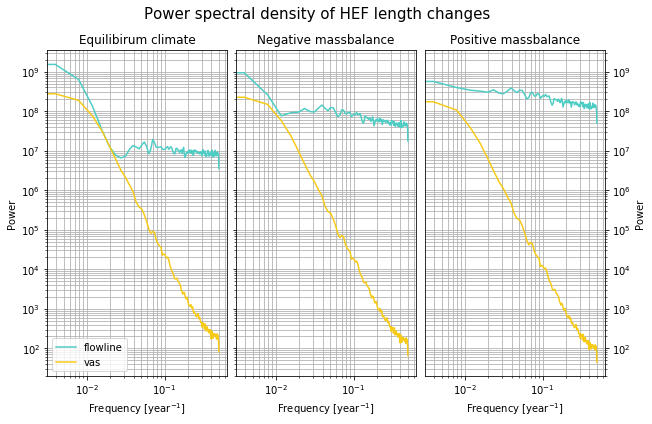

In [174]:
title = ['Equilibirum climate', 'Negative massbalance', 'Positive massbalance']
suptitle = 'Power spectral density of HEF length changes'
plot_psd(ds.sel(mb_model='random', normalized=False), title=title, suptitle=suptitle)

# save plot to file
plt.savefig('psd_length_random.pdf', bbox_inches='tight')

I'm not sure whether it is a good idea or not to perform a spectral analysis on the sum of all glacier lengths... so let's look at all the individual ones.

In [251]:
# read run output for the flowline model under random climate
path = '/Users/oberrauch/work/master/working_directories/equilibrium_wdir/'
path += 'run_output_random_fl.nc'
run_ds = xr.open_dataset(path)
run_ds

<xarray.Dataset>
Dimensions:         (normalized: 2, temp_bias: 3, time: 10001)
Coordinates:
  * time            (time) float64 0.0 1.0 2.0 3.0 ... 9.998e+03 9.999e+03 1e+04
    hydro_year      (time) int64 ...
    hydro_month     (time) int64 ...
    calendar_year   (time) int64 ...
    calendar_month  (time) int64 ...
  * temp_bias       (temp_bias) float64 0.0 0.5 -0.5
    model           object ...
    mb_model        object ...
  * normalized      (normalized) bool False True
Data variables:
    volume          (normalized, temp_bias, time) float64 ...
    area            (normalized, temp_bias, time) float64 ...
    length          (normalized, temp_bias, time) float64 ...
    ela             (normalized, temp_bias, time) float64 ...

Turns out, the `run_output.nc` file is already the sum (or average) over all glacier entities... let's retrive the 'raw' data for each Glacier Directory.

In [252]:
import geopandas as gpd
from oggm import cfg, utils, workflow

# specify path to working directory used in the `equilibrium_run.py` script
wdir = '/Users/oberrauch/work/master/working_directories/'
wdir += 'equilibrium_wdir'

# define RGI version and region
rgi_version = '6'
rgi_region = '11'

# load default parameter file and set needed values
cfg.initialize()
cfg.PATHS['working_dir'] = wdir
cfg.PARAMS['rgi_version'] = rgi_version
cfg.PARAMS['border'] = 120
cfg.PARAMS['baseline_climate'] = 'HISTALP'
cfg.PARAMS['prcp_scaling_factor'] = 1.75
cfg.PARAMS['temp_melt'] = -1.75
cfg.PARAMS['use_bias_for_run'] = False

# read the RGI dataframe containing the Rofental glaciers
rgi_ids = [rgi_id for rgi_id in pd.read_csv('/Users/oberrauch/work/master/data/rofental_rgi.csv').RGIId]
# read RGI entry for the glaciers as DataFrame
# containing the outline area as shapefile
rgidf = utils.get_rgi_glacier_entities(rgi_ids)

# get and set path to intersect shapefile
intersects_db = utils.get_rgi_intersects_region_file(region=rgi_region)
cfg.set_intersects_db(intersects_db)

# create glacier directories
gdirs = workflow.init_glacier_regions(rgidf)

2020-08-03 18:17:57: oggm.cfg: Using configuration file: /Users/oberrauch/oggm-fork/oggm/params.cfg


In [254]:
# define temperature biases and suffixes
temp_biases = (0, 0.5, -0.5)
suffixes = ['_normal', '_bias_p', '_bias_n']

run_ds = list()
for suffix in suffixes:
    # compile the output for each run
    run_ds_ = utils.compile_run_output(np.atleast_1d(gdirs),
                                   filesuffix=suffix, path=False)
    run_ds.append(run_ds_)
    
# concat into one dataset with temperature bias as coordinate
run_ds = xr.concat(run_ds, pd.Index(temp_biases, name='temp_bias'))
# add model type as coordinate
run_ds.coords['model'] = 'fl'
# add mb model type as coordinate
run_ds.coords['mb_model'] = 'random'

In [326]:
run_ds

<xarray.Dataset>
Dimensions:         (normalized: 2, rgi_id: 54, temp_bias: 3, time: 10001)
Coordinates:
  * time            (time) float64 0.0 1.0 2.0 3.0 ... 9.998e+03 9.999e+03 1e+04
  * rgi_id          (rgi_id) <U14 'RGI60-11.00674' ... 'RGI60-11.01040'
    hydro_year      (time) int64 0 1 2 3 4 5 ... 9995 9996 9997 9998 9999 10000
    hydro_month     (time) int64 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1
    calendar_year   (time) int64 -1 0 1 2 3 4 ... 9994 9995 9996 9997 9998 9999
    calendar_month  (time) int64 10 10 10 10 10 10 10 ... 10 10 10 10 10 10 10
  * temp_bias       (temp_bias) float64 0.0 0.5 -0.5
    model           <U2 'fl'
    mb_model        <U6 'random'
  * normalized      (normalized) bool False True
Data variables:
    volume          (normalized, temp_bias, time, rgi_id) float64 4.244e+07 ... 3.505
    area            (normalized, temp_bias, time, rgi_id) float64 9.563e+05 ... 2.927
    length          (normalized, temp_bias, time, rgi_id) float64 1.77

In [255]:
def normalize_ds_with_start(ds, store_var_0=False):
    """ Normalize all data variables of the given xarray Dataset
    with their respective first entry. Returns a new xarray.Dataset.

    Parameters
    ----------
    ds: :py:class:`xarray.Dataset`

    Returns
    -------
    Normalized xarray Dataset

    """
    # copy dataset
    ds_norm = ds.copy(deep=True)

    # iterate over all data variables
    for var in ds_norm:
        # add information about the initial values
        var_0 = ds_norm[var].isel(time=0)
        if store_var_0:
            ds_norm[var + '_0'] = var_0
        # normalize dataset
        ds_norm[var] /= var_0

    return ds_norm

In [259]:
# normalize with start value
run_ds_normal = normalize_ds_with_start(run_ds)

# add coordinate destiguishing between normalized and absolute values
run_ds.coords['normalized'] = False
run_ds_normal.coords['normalized'] = True

# combine datasets
run_ds = xr.concat([run_ds, run_ds_normal], 'normalized')

In [113]:
run_ds = ds

In [117]:
ds_tmp

<xarray.DataArray 'length' (time: 10001, rgi_id: 58)>
array([[1.86000000e+03, 8.32000000e+02, 3.36000000e+02, ...,
        8.64000000e+02, 8.67020747e+02, 3.34323200e+06],
       [1.98400000e+03, 8.64000000e+02, 3.60000000e+02, ...,
        9.00000000e+02, 9.53268154e+02, 3.67580200e+06],
       [1.98400000e+03, 8.64000000e+02, 3.60000000e+02, ...,
        9.00000000e+02, 9.56403527e+02, 3.68789200e+06],
       ...,
       [1.98400000e+03, 1.28000000e+03, 5.76000000e+02, ...,
        1.40400000e+03, 9.84217324e+02, 3.79514200e+06],
       [1.98400000e+03, 1.31200000e+03, 3.36000000e+02, ...,
        2.12400000e+03, 9.96276452e+02, 3.84164200e+06],
       [1.98400000e+03, 1.28000000e+03, 3.36000000e+02, ...,
        1.51200000e+03, 1.00194295e+03, 3.86349200e+06]])
Coordinates:
    normalized      bool False
    model           <U2 'fl'
  * time            (time) float64 0.0 1.0 2.0 3.0 ... 9.998e+03 9.999e+03 1e+04
  * rgi_id          (rgi_id) object 'RGI60-11.00002' 'RGI60-11.00012' ... 'sum'
    temp_bias       float64 0.0
    hydro_year      (time) int64 0 1 2 3 4 5 ... 9995 9996 9997 9998 9999 10000
    hydro_month     (time) int64 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1
    mb_model        <U6 'random'
    calendar_year   (time) int64 -1 0 1 2 3 4 ... 9994 9995 9996 9997 9998 9999
    calendar_month  (time) int64 10 10 10 10 10 10 10 ... 10 10 10 10 10 10 10
Attributes:
    description:  Glacier length
    units:        m

In [128]:

ds_tmp

<xarray.Dataset>
Dimensions:         (rgi_id: 58, time: 10001)
Coordinates:
    normalized      bool False
    model           <U2 'fl'
  * time            (time) float64 0.0 1.0 2.0 3.0 ... 9.998e+03 9.999e+03 1e+04
  * rgi_id          (rgi_id) object 'RGI60-11.00002' 'RGI60-11.00012' ... 'sum'
    temp_bias       float64 0.0
    hydro_year      (time) int64 0 1 2 3 4 5 ... 9995 9996 9997 9998 9999 10000
    hydro_month     (time) int64 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1
    mb_model        <U6 'random'
    calendar_year   (time) int64 -1 0 1 2 3 4 ... 9994 9995 9996 9997 9998 9999
    calendar_month  (time) int64 10 10 10 10 10 10 10 ... 10 10 10 10 10 10 10
Data variables:
    volume          (time, rgi_id) float64 1.058e+08 9.129e+06 ... 1.678e+11
    area            (time, rgi_id) float64 2.292e+06 1.97e+05 ... 2.226e+09
    length          (time, rgi_id) float64 1.86e+03 832.0 ... 3.863e+06
    ela             (time, rgi_id) float64 2.559e+03 2.807e+03 ... 1.137e+07
Attributes:
    description:    OGGM model output
    oggm_version:   1.3.2.dev86+g5d61f9d
    calendar:       365-day no leap
    creation_date:  2020-08-14 20:43:07

In [ ]:

sig = ds_tmp.sel(rgi_id=rgi_id).length.values.flatten()
freqs, psd = signal.welch(sig)
plt.loglog(freqs, psd, label='flowline')

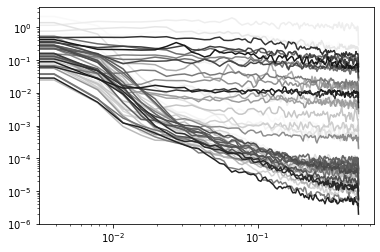

In [130]:
plt.figure()
normalized = True
model = 'fl'
ds_tmp = ds.sel(normalized=normalized, temp_bias=temp_bias, model=model, mb_model='random')
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.Greys(np.linspace(0, 0.95, len(ds_tmp.rgi_id.values)))))

# iterate over all glacier entities
for rgi_id in ds_tmp.rgi_id.values[:-2]:
    # compute the power of the signel per frequency band
    sig = ds_tmp.sel(rgi_id=rgi_id).length.values.flatten()
    freqs, psd = signal.welch(sig)
    plt.loglog(freqs, psd, label='flowline')

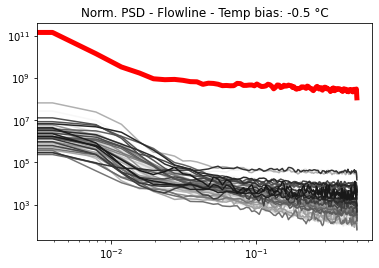

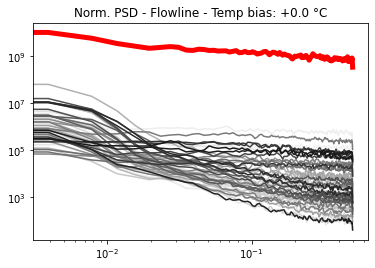

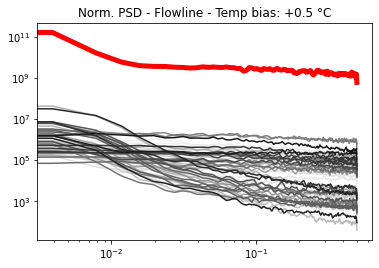

In [153]:
for temp_bias in [-0.5, 0, 0.5]:
    plt.figure()
    normalized = False
    model = 'fl'
    ds_tmp = ds.sel(normalized=normalized, temp_bias=temp_bias, model=model, mb_model='random')
    plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.Greys(np.linspace(0, 0.95, len(ds_tmp.rgi_id.values)))))

    # iterate over all glacier entities
    for rgi_id in ds_tmp.rgi_id.values[:-2]:
        # compute the power of the signel per frequency band
        sig = ds_tmp.sel(rgi_id=rgi_id).length.values.flatten()
        freqs, psd = signal.welch(sig)
        plt.loglog(freqs, psd, label='flowline')

    # select values by temperature bias
    ds_tmp = ds_tmp.sel(rgi_id='sum').length

    # compute the power of the signel per frequency band
    sig = ds_tmp.values.flatten()
    freqs, psd = signal.welch(sig)
    plt.loglog(freqs, psd, label='flowline', c='r', lw=5)
    plt.title('Norm. PSD - Flowline - Temp bias: {:+.1f} °C'.format(temp_bias))

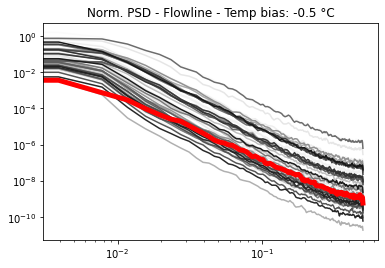

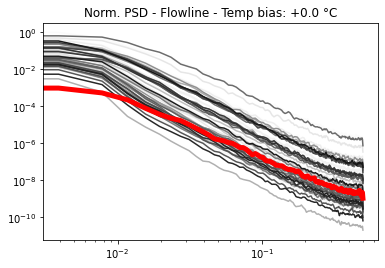

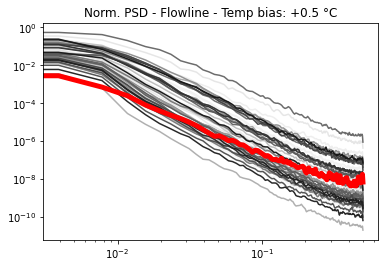

In [138]:
for temp_bias in [-0.5, 0, 0.5]:
    plt.figure()
    normalized = True
    model = 'vas'
    ds_tmp = ds.sel(normalized=normalized, temp_bias=temp_bias, model=model, mb_model='random')
    plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.Greys(np.linspace(0, 0.95, len(ds_tmp.rgi_id.values)))))

    # iterate over all glacier entities
    for rgi_id in ds_tmp.rgi_id.values[:-2]:
        # compute the power of the signel per frequency band
        sig = ds_tmp.sel(rgi_id=rgi_id).length.values.flatten()
        freqs, psd = signal.welch(sig)
        plt.loglog(freqs, psd, label='flowline')

    # select values by temperature bias
    ds_tmp = ds_tmp.sel(rgi_id='sum').length

    # compute the power of the signel per frequency band
    sig = ds_tmp.values.flatten()
    freqs, psd = signal.welch(sig)
    plt.loglog(freqs, psd, label='flowline', c='r', lw=5)
    plt.title('Norm. PSD - VAS - Temp bias: {:+.1f} °C'.format(temp_bias))

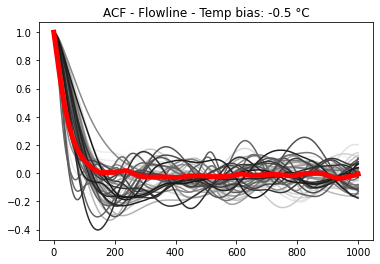

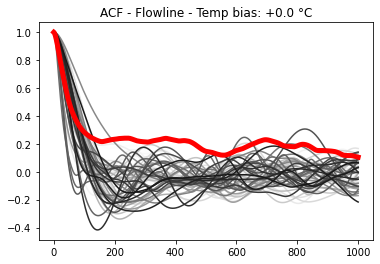

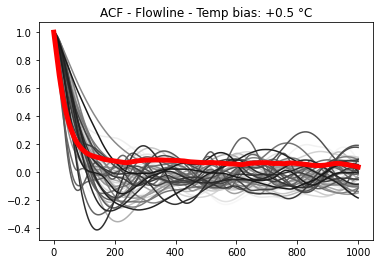

In [154]:
for temp_bias in [-.5, 0, 0.5]:
    plt.figure()
    normalized = False
    model = 'vas'
    ds_tmp = ds.sel(normalized=normalized, temp_bias=temp_bias,
                    model=model, mb_model='random').isel(time=slice(0,10000))
    plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.Greys(np.linspace(0, 0.95, len(ds_tmp.rgi_id.values)))))

    # iterate over all glacier entities
    for rgi_id in ds_tmp.rgi_id.values[:-2]:
        # get length data
        length = ds_tmp.sel(rgi_id=rgi_id).length
        # plot autocorrelation
        plt.plot(stattools.acf(length, fft=True, nlags=nlags))

    length = ds_tmp.sel(rgi_id='sum').length
    plt.plot(stattools.acf(length, fft=True, nlags=nlags), c='r', lw=5)
    plt.title('ACF - VAS - Temp bias: {:+.1f} °C'.format(temp_bias))

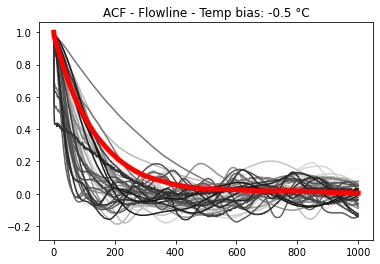

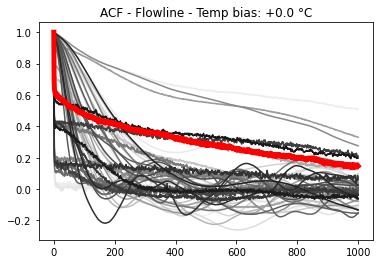

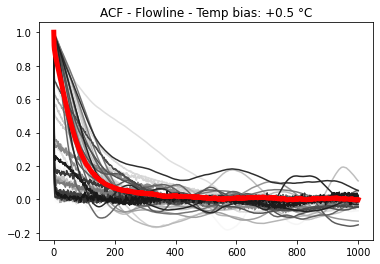

In [155]:
for temp_bias in [-.5, 0, 0.5]:
    plt.figure()
    normalized = False
    model = 'fl'
    ds_tmp = ds.sel(normalized=normalized, temp_bias=temp_bias,
                    model=model, mb_model='random').isel(time=slice(0,10000))
    plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.Greys(np.linspace(0, 0.95, len(ds_tmp.rgi_id.values)))))

    # iterate over all glacier entities
    for rgi_id in ds_tmp.rgi_id.values[:-2]:
        # get length data
        length = ds_tmp.sel(rgi_id=rgi_id).length
        # plot autocorrelation
        plt.plot(stattools.acf(length, fft=True, nlags=nlags))

    length = ds_tmp.sel(rgi_id='sum').length
    plt.plot(stattools.acf(length, fft=True, nlags=nlags), c='r', lw=5)
    plt.title('ACF - Flowline - Temp bias: {:+.1f} °C'.format(temp_bias))

In [282]:
psd/psd[0]

array([1.        , 5.64143139, 2.33991584, 0.50611296, 0.12215717,
       0.04664007, 0.02840659, 0.0242749 , 0.02660546, 0.03947618,
       0.04976783, 0.04585301, 0.04133349, 0.05107735, 0.06118182,
       0.04808414, 0.0309001 , 0.04021204, 0.07137926, 0.05881045,
       0.04527249, 0.04472187, 0.04539021, 0.04620678, 0.0403346 ,
       0.03953831, 0.04044422, 0.04421142, 0.04693697, 0.04005176,
       0.04407882, 0.04664321, 0.04112832, 0.03414579, 0.03059211,
       0.03142237, 0.04222779, 0.04223508, 0.03864789, 0.0351403 ,
       0.03295977, 0.03849063, 0.03855402, 0.03152137, 0.03876333,
       0.04476397, 0.02912192, 0.02488924, 0.02939059, 0.0332753 ,
       0.0338293 , 0.03150701, 0.0369774 , 0.03858858, 0.03323821,
       0.03371663, 0.03851926, 0.03129569, 0.03463776, 0.03676077,
       0.02791898, 0.03423738, 0.03887795, 0.03525232, 0.03471595,
       0.0371777 , 0.0346083 , 0.03454379, 0.03233017, 0.03393063,
       0.03461723, 0.0314815 , 0.0327176 , 0.030806  , 0.03252

In [246]:
ds_tmp.sel(rgi_id=rgi_id)

<xarray.Dataset>
Dimensions:         (time: 10001)
Coordinates:
  * time            (time) float64 0.0 1.0 2.0 3.0 ... 9.998e+03 9.999e+03 1e+04
    rgi_id          <U14 'RGI60-11.00674'
    hydro_year      (time) int64 0 1 2 3 4 5 ... 9995 9996 9997 9998 9999 10000
    hydro_month     (time) int64 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1
    calendar_year   (time) int64 -1 0 1 2 3 4 ... 9994 9995 9996 9997 9998 9999
    calendar_month  (time) int64 10 10 10 10 10 10 10 ... 10 10 10 10 10 10 10
    temp_bias       float64 0.0
    model           <U2 'fl'
    mb_model        <U6 'random'
    normalized      bool False
Data variables:
    volume          (time) float64 4.244e+07 4.217e+07 ... 5.334e+07 5.204e+07
    area            (time) float64 9.563e+05 9.552e+05 ... 9.799e+05 9.705e+05
    length          (time) float64 1.776e+03 1.824e+03 ... 2.208e+03 1.824e+03
    ela             (time) float64 3.19e+03 3.168e+03 ... 3.402e+03 3.201e+03
Attributes:
    description:    OGGM 

In [ ]:





# store datasets
if path:
    if path is True:
        mb = 'random' if use_random_mb else 'constant'
        path = os.path.join(cfg.PATHS['working_dir'],
                            'run_output_{}_fl.nc'.format(mb))

    ds.to_netcdf(path)

return ds